In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Services'
industry_list = all_industries[sector]

In [4]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'OMC', 'name': 'Omnicom Group Inc', 'last_day_data_date': '2024-06-18', 'adjusted_close': 91.16, 'refund_1d': 1.08, 'refund_1d_p': 1.2, 'refund_5d': 1.51, 'refund_5d_p': 1.68, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 17852227584, 'earnings_share': 7.39, 'dividend_yield': 0.0307, 'sector': 'Communication Services', 'industry': 'Advertising Agencies', 'avgvol_1d': 1535720, 'avgvol_200d': 1469141.1}, {'code': 'IPG', 'name': 'Interpublic Group of Companies Inc', 'last_day_data_date': '2024-06-18', 'adjusted_close': 29.58, 'refund_1d': 0, 'refund_1d_p': 0, 'refund_5d': -0.7, 'refund_5d_p': -2.31, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 11164201984, 'earnings_share': 2.81, 'dividend_yield': 0.0446, 'sector': 'Communication Services', 'industry': 'Advertising Agencies', 'avgvol_1d': 5017096, 'avgvol_200d': 3727971.56}, {'code': 'WPP', 'name': 'WPP PLC ADR', 'last_day_data_date': '2024-06-18', 'adjusted_close': 46.96, 'ref

In [5]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

OMC
IPG
WPP
EEX
DLX
CCO
BOC
CTV
EVC
TSQ
DDS
M
JWN
KSS
EXTO
EDU
TAL
GHC
LRN
ATGE
GOTU
COUR
UTI
FC
DAO
CHGG
MYND
IH
STG
SKIL
BEDU
COE
GNS
AIU
FEDU
AMBO
KR
ACI
ASAI
WMK
NGVC
DDL
ACN
IBM
FI
INFY
FIS
IT
WIT
BR
GIB
LDOS
EPAM
CACI
PSN
GLOB
SAIC
KD
G
ASGN
CLVT
DXC
NABL
WNS
VYX
BBAI
UIS
NOTE
BTCM
WYY
CTM
HLT
IHG
H
WH
CHH
SHCO
GHG
ROL
SCI
HRB
BFAM
MCW
CSV
MED
RGS
UNP
CNI
CP
NSC
WAB
TRN
GBX
URI
AER
UHAL-B
UHAL
R
AL
GATX
AL-PA
HRI
VSTS
TRTN-PA
PRG
CTOS
GSL
AAN
ALTG
GSL-PB
MWG
TRTN-PB
TRTN-PC
TRTN-PD
ALTG-PA
TRTN-PE
CTOSW
LVS
MGM
MTN
BYD
HGV
VAC
MSC
BALY
MCD
CMG
YUM
QSR
DPZ
DRI
YUMC
CAVA
BROS
SHAK
SG
EAT
ARCO
CNNE
DIN
BH
BH-A
BDL
PNST
ALLE
MSA
ADT
BCO
BRC
REZI
GEO
CXW
NL
CIX
MG
UUU
EBWK
XPO
TFII
KNX
SNDR
RXO
BEST
ADVWW
ZD
CMPR
CRTO
MGNI
STGW
IAS
ADV
QNST
NCMI
CDLX
ADTH
HAO
TZOO
WIMI
STCN
MCHX
DRCT
FLNT
ABLV
SWAG
DLPN
ANTE
ICLK
MOBQ
LDWY
MGOL
SRAX
CNET
BAOS
GSMGW
SWAGW
ADTHW
ABLVW
VSME
CHR
LOPE
STRA
LAUR
AFYA
PRDO
UDMY
LINC
VTRU
APEI
VSTA
QSG
AACG
JZ
YQ
EDTK
TWOU
EEIQ
GSUN
GV
CLEU
WAFU
LXEH
TCTM
SFM

In [6]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [7]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [8]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [9]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [10]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [11]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [12]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
lack_finan_cout = 0
price_cout = 0
FCF_cout = 0
Dividend_cout = 0
EPS_cout = 0
EBITDA_cout = 0
Debt_cout = 0
Shares_cout = 0
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        price_cout += 1
        continue
    try:
        financial = stock['Financials']
    except Exception as e:
        print(f"{code} no Financial data provided: {e}")
        lack_finan_cout += 1
        continue

    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            Debt_cout += 1
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        Debt_cout += 1
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            EBITDA_cout += 1
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        EBITDA_cout += 1
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            FCF_cout += 1
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        FCF_cout += 1
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        Shares_cout += 1
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        Shares_cout += 1
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            EPS_cout += 1
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        EPS_cout += 1
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        EBITDA_cout += 1
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        EPS_cout += 1
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            Dividend_cout += 1
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        price_cout += 1
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


BOC has no Dividend Paid
CTV has no Dividend Paid
EXTO EPS Zero error
TAL has no debt data in database
GOTU has no debt data in database
COUR has no debt data in database
DAO has no Dividend Paid
MYND EBITDA Zero error
IH has no debt data in database
SKIL has no Dividend Paid
COE has no debt data in database
AIU EPS Zero error
FEDU has no debt data in database
AMBO has no Dividend Paid
WMK has no debt data in database
DDL has no debt data in database
KD has no Dividend Paid
UIS has no Dividend Paid
NOTE has no Dividend Paid
BTCM has no debt data in database
WYY has no debt data in database
SHCO has no Dividend Paid
MCW has no Dividend Paid
MED has no debt data in database
RGS has no Dividend Paid
TRTN-PA EPS Zero error
CTOS has no Dividend Paid
MWG EPS Zero error
TRTN-PB Share probably zero: float division by zero
TRTN-PC Share probably zero: float division by zero
TRTN-PD Share probably zero: float division by zero
ALTG-PA Share probably zero: float division by zero
TRTN-PE Share prob

In [13]:
print(f"Stocks with no Financial data provided:{lack_finan_cout}")
print(f"Stocks lack price data:{price_cout}")
print(f"Stocks lack FCF data or FCF zero:{FCF_cout}")
print(f"Stocks lack EPS data or EPS zero:{EPS_cout}")
print(f"Stocks lack Debt data or Debt zero:{Debt_cout}")
print(f"Stocks lack shares data or shares zero:{Shares_cout}")
print(f"Stocks lack EBITDA data or EBITDA zero:{EBITDA_cout}")
print(f"Stocks pay zero dividend:{Dividend_cout}")
print(f"total numer check {len(Codelist) + lack_finan_cout + price_cout + FCF_cout+ Debt_cout + EPS_cout + EBITDA_cout + Dividend_cout + Shares_cout}")


Stocks with no Financial data provided:0
Stocks lack price data:3
Stocks lack FCF data or FCF zero:1
Stocks lack EPS data or EPS zero:11
Stocks lack Debt data or Debt zero:36
Stocks lack shares data or shares zero:27
Stocks lack EBITDA data or EBITDA zero:8
Stocks pay zero dividend:71
total numer check 377


In [14]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

220
220
220
220
220


In [15]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

In [4]:
df = pd.read_csv('Services.csv')

In [5]:
def drop_outliers_and_calculate_center(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    print(filtered_data.shape)
    max_value = filtered_data[column].max()
    min_value = filtered_data[column].min()
    
    mean_center = filtered_data[column].mean()
    median_center = filtered_data[column].median()
    
    return max_value, min_value, mean_center, median_center

In [7]:
[DebtMax, DebtMin, DebtMean, DebtMedian] = drop_outliers_and_calculate_center(df, 'Debt')
[DividendMax, DividendMin, DividendMean, DividendMedian] = drop_outliers_and_calculate_center(df, 'Dividend Yield')
[EPSMax, EPSMin, EPSMean, EPSMedian] = drop_outliers_and_calculate_center(df, 'EPS Yield')
[FCFMax, FCFMin, FCFMean, FCFMedian] = drop_outliers_and_calculate_center(df, 'FCF')
print(f"Max of the debt data of stocks is {DebtMax :.2f}, min is {DebtMin:.2f}, mean is {DebtMean:.2f} and median is {DebtMedian:.2f}")
print(f"Max of the Dividend Yield data of stocks is {DividendMax* 100:.2f}%, min is {DividendMin* 100:.2f}%, mean is {DividendMean* 100:.2f}% and median is {DividendMedian* 100:.2f}%")
print(f"Max of the EPS Yield data of stocks is {EPSMax* 100:.2f}%, min is {EPSMin* 100:.2f}%, mean is {EPSMean* 100:.2f}% and median is {EPSMedian* 100:.2f}%")
print(f"Max of the FCF Yield data of stocks is {FCFMax* 100:.2f}%, min is {FCFMin* 100:.2f}%, mean is {FCFMean* 100:.2f}% and median is {FCFMedian* 100:.2f}%")

(204, 5)
(187, 5)
(176, 5)
(181, 5)
Max of the debt data of stocks is 8.63, min is -3.98, mean is 2.30 and median is 1.92
Max of the Dividend Yield data of stocks is 10.62%, min is 0.00%, mean is 2.25% and median is 1.59%
Max of the EPS Yield data of stocks is 16.14%, min is -4.30%, mean is 5.59% and median is 5.16%
Max of the FCF Yield data of stocks is 22.04%, min is -13.10%, mean is 4.18% and median is 4.54%


In [5]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(20,'Debt'))
top_50s.append(positive_df.nlargest(20,'Dividend Yield'))
top_50s.append(positive_df.nlargest(20,'EPS Yield'))
top_50s.append(positive_df.nlargest(20,'FCF'))
worst_100s.append(positive_df.nlargest(100, 'Debt'))
worst_100s.append(positive_df.nsmallest(100, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(100, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(100, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [6]:
print(final_selection.shape)
print(final_selection)

(14, 5)
    Code       Debt  Dividend Yield  EPS Yield        FCF
0   PRDO 0.00041530      0.01885317 0.12131269 0.13630128
1   ATAT 0.00163530      0.18300399 0.23076923 0.70216082
3   CRTO 0.00282410      0.02659259 0.10037069 0.06176453
26   STG 0.16451102      0.88959900 4.83087449 0.12651825
31   PRG 0.30762558      0.40071836 0.10051218 0.11641277
32  HTHT 0.24244657      0.37862858 0.30930233 0.47398566
34  LOCO 1.46783604      0.36198021 0.08213552 0.09903252
39   WPP 1.45668532      0.07502802 0.72333600 0.15717793
40   GHG 0.13981292      0.25965307 0.53697749 0.55454921
41   GSL 1.22237345      0.08917445 0.47141074 0.33514294
43  STCN 0.57660451      0.03580019 0.31844046 0.36632522
50     M 1.47757516      0.03360758 0.16105173 0.07360790
52   DXC 0.80631342      0.03269179 0.14945780 0.15142836
57   KSS 1.16087881      0.06938957 0.08698641 0.23781698


/var/folders/ts/44q4rn9x707fjwwdsp_xcst40000gn/T/ipykernel_32185/849618875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_selection['EPS Yield'] = final_selection['EPS Yield'] * 100


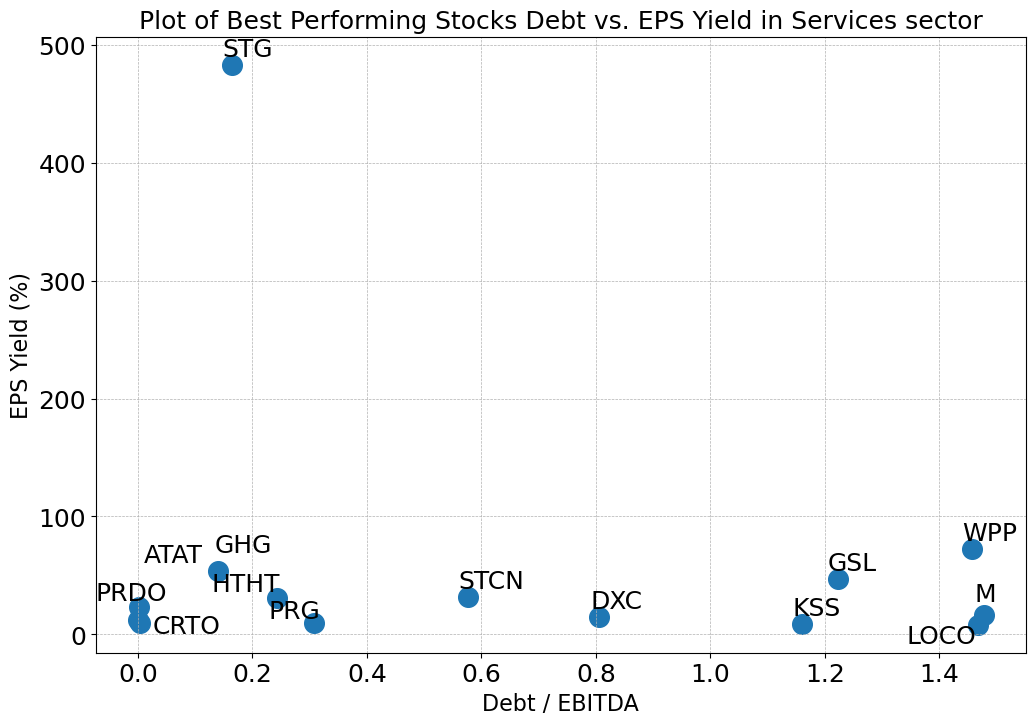

In [10]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA', fontsize=16)
plt.ylabel('EPS Yield (%)', fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

# Convert EPS Yield to percentage
final_selection['EPS Yield'] = final_selection['EPS Yield'] * 100

scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield'], s=200)

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()


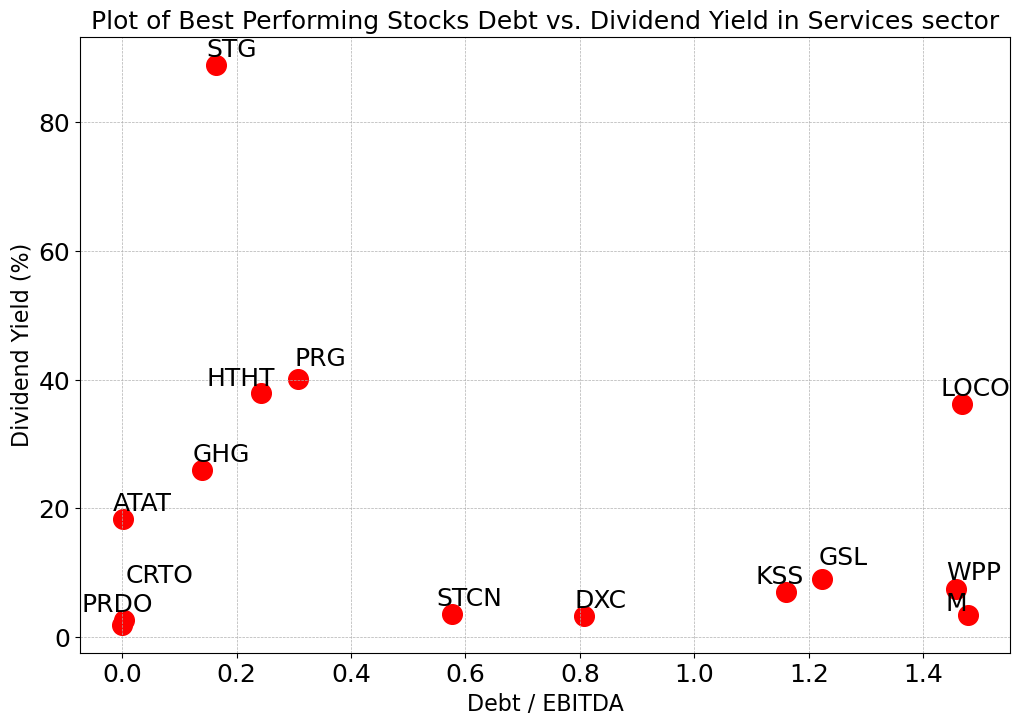

In [11]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA', fontsize=16)
plt.ylabel('Dividend Yield (%)', fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

# Convert Dividend Yield to percentage
plot_data = final_selection[final_selection['Code'] != 'AMTD']
plot_data['Dividend Yield'] = plot_data['Dividend Yield'] * 100

scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r', s=200)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()


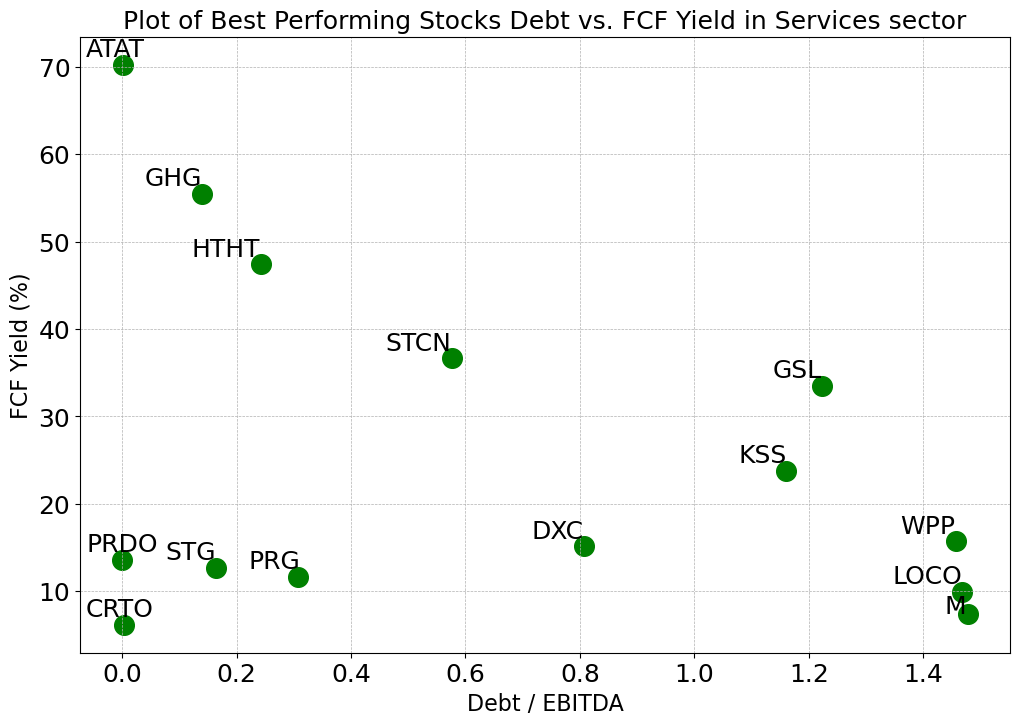

In [12]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA', fontsize=16)
plt.ylabel('FCF Yield (%)', fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

# Convert FCF Yield to percentage
plot_data['FCF'] = plot_data['FCF'] * 100

scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g', s=200)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()


In [7]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [8]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [9]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


PRDO
ATAT
CRTO
STG
PRG
HTHT
LOCO
WPP
GHG
GSL
STCN
M
DXC
KSS


In [10]:
all_returns = []
for stock in stocks_Best:
    try:
        all_returns.append(get_all_returns(stock))
    except Exception as e:
        print(f"{stock['General']['Code']} price error: {e}")
        continue


In [11]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [12]:
all_returns.append(GSPC_returns)

In [13]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [14]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

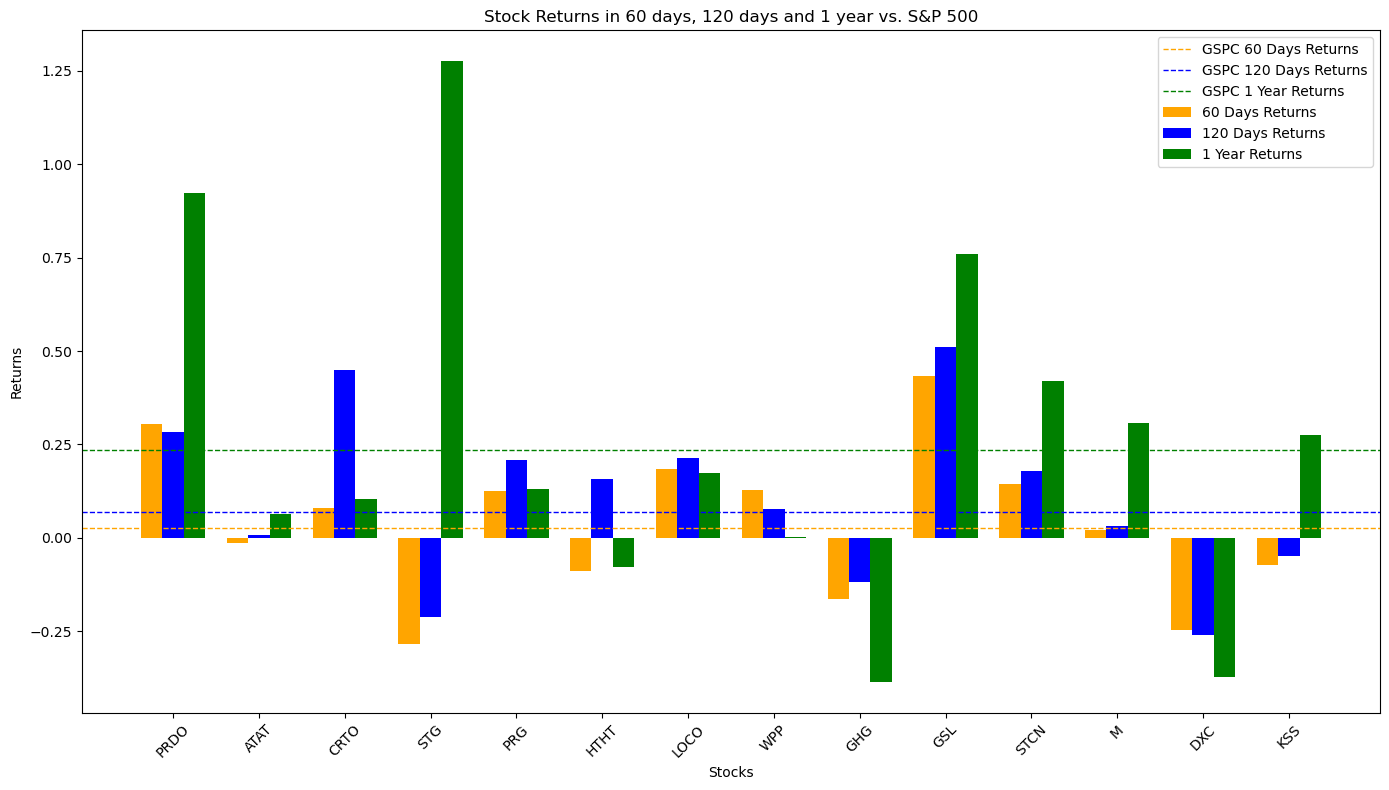

In [15]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [16]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 3.96%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 10.60%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 25.72%
Return for Investing in S&P500 in 1 year is 23.62%


In [7]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']

In [8]:
code_list = final_selection['Code']
print(code_list)

0     PRDO
1     ATAT
3     CRTO
26     STG
31     PRG
32    HTHT
34    LOCO
39     WPP
40     GHG
41     GSL
43    STCN
50       M
52     DXC
57     KSS
Name: Code, dtype: object


In [9]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    for date in time_list:
        try: 
            price = float(api.get_eod_historical_stock_market_data(symbol = stock, from_date = date, to_date= date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price,returns])
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, 0, 0])
            print(f'{stock} on {date} error :{e}')
            continue
    return price_list


In [10]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    error_list = []
    previous_price = initial_price
    previous_returns = 0 

    for date in time_list:
        try:
            price = float(api.get_eod_historical_stock_market_data(symbol=stock, from_date=date, to_date=date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price, returns])
            previous_price = price
            previous_returns = returns
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, previous_price, previous_returns])
            print(f'{stock} on {date} error: {e}')
            continue
    
    return price_list, error_list

all_profolio = []
skip_stock = 'STG'

for s in code_list:
    if s == skip_stock:
        continue 
    try:
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    except Exception as e:
        print(f'{s} cannot get initial price')
        initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[1], to_date = date_list[1])[0]['adjusted_close'])
        continue
    stock_performance, error_list = get_price_list(s, date_list, initial_price)
    if error_list:
        print(error_list)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

print(len(all_profolio))

13


In [12]:
print(len(all_profolio))

13


In [12]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 

In [13]:
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

std = np.std(total)
print('SD: ', std)

[ 0.          0.04041401  0.03866318  0.03260774  0.06956767  0.07969529
  0.10457956  0.12379945  0.19245501  0.18513342  0.15350393  0.11486615
  0.07920442  0.06428466  0.03467977  0.02730827  0.018573    0.02086757
  0.00165099  0.00529534 -0.01540878 -0.00545779  0.00466933 -0.02542923
  0.02888248  0.01447423  0.03674978  0.05838829  0.06898546  0.09083025
  0.06836649  0.05693394  0.03633704  0.04890045  0.08352517  0.03565221
  0.08143253  0.07292106  0.07136273  0.07611046  0.08322635  0.08569687
  0.10441487  0.11824178  0.09627094  0.06196769  0.09855024  0.14078591
  0.20659657  0.22199893  0.20967205  0.21398393  0.17886474]
SD:  0.062093557385863446


In [15]:
import json
listofcodes = [code for code in code_list.tolist() if code != 'KLG']
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [16]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']
sector_title = sector + ' Sector'
std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Services Sector is:  0.06209355738586328


In [14]:
import csv
import os

sector_name = sector
sector_profolio_with_name = [[sector_name] + row for row in all_profolio]

# 检查是否成功提取 all_profolio 数据
if sector_profolio_with_name:
    print("Successfully extracted all_profolio data with sector name.")
else:
    print("No all_profolio data found.")

# 定义 CSV 文件路径
csv_file_path = '/Users/rensiyu/Desktop/Task3/portfolios.csv'

# 检查 CSV 文件是否存在
file_exists = os.path.isfile(csv_file_path)

# 将数据保存到 CSV 文件
if sector_profolio_with_name:
    with open(csv_file_path, 'a', newline='', encoding='utf-8') as csv_file:
        writer = csv.writer(csv_file)
        
        # 如果文件不存在，则写入表头
        if not file_exists:
            headers = ['Sector'] + ['Return_' + str(i + 1) for i in range(len(sector_profolio_with_name[0]) - 1)]
            writer.writerow(headers)
        
        # 写入数据行
        writer.writerows(sector_profolio_with_name)
        
    print(f"Portfolio data has been saved to {csv_file_path}.")
else:
    print("No portfolio data to save.")

Successfully extracted all_profolio data with sector name.
Portfolio data has been saved to /Users/rensiyu/Desktop/Task3/portfolios.csv.


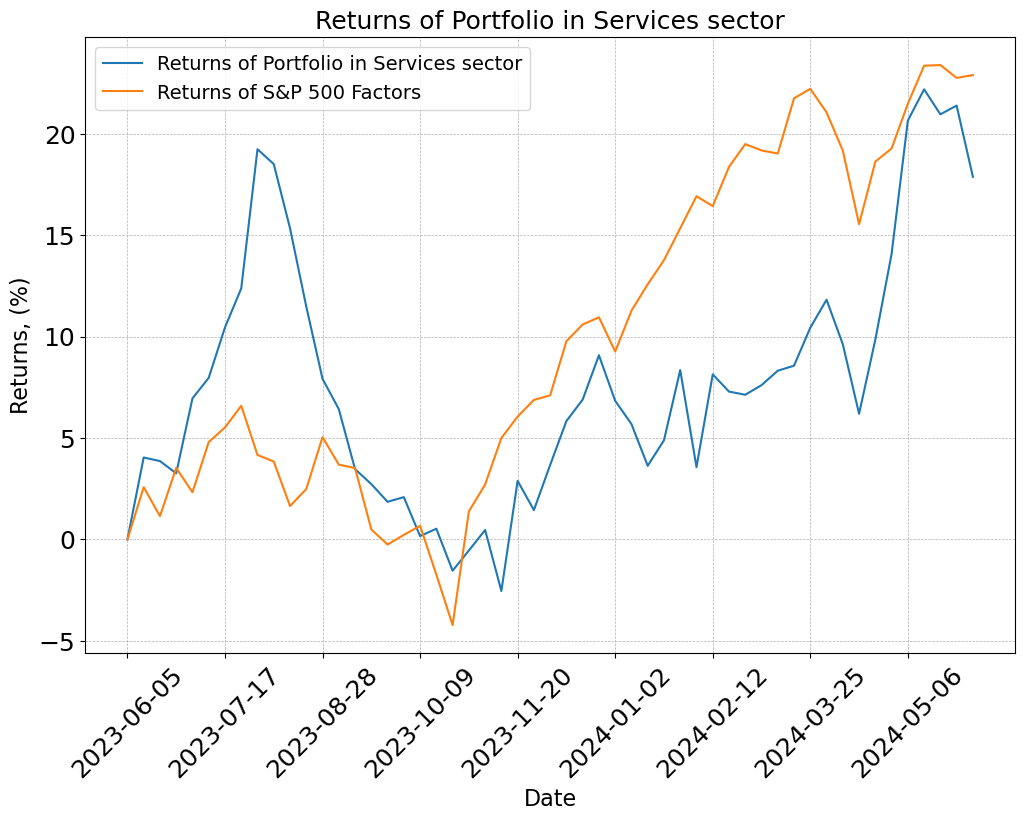

In [18]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()